# Homework 1
This is the template for the first homework assignment.
The only function that you are required to fill in and turn in to Gradescope is "compute_features".
Please do not edit definition of "compute_features" so the Gradescope unit tests run successfully.

In [1]:
# Uncomment and run this code if you want to verify your `sklearn` installation.
# If this cell outputs 'array([1])', then it's installed correctly.

# from sklearn import tree
# X = [[0, 0], [1, 1]]
# y = [0, 1]
# clf = tree.DecisionTreeClassifier(criterion='entropy')
# clf = clf.fit(X, y)
# clf.predict([[2, 2]])

array([1])

In [6]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import random


In [7]:
X_train = np.load("madelon/train/X_train.npy")
y_train = np.load("madelon/train/Y_train.npy")
X_test = np.load("madelon/test/X_test.npy")
y_test = np.load("madelon/test/Y_test.npy")
# X_train1 = np.

In [8]:

# sdg_train_accuracy,sdg_test_accuracy,sdg_trained_model = train_and_evaluate_sgd(x_train,y_train,x_test,y_test) 




In [18]:
# sdg model full train and test set

sgd_model = SGDClassifier(loss = 'log', max_iter = 10000)
sgd_model = sgd_model.fit(X_train,y_train)
sgd_model.predict(X_test)
sgd_testing_accuracy = sgd_model.score(X_test,y_test)
print(sgd_testing_accuracy)

0.595


In [19]:
# cross validation of Sgd

k = 5
acc_train_sgd = np.zeros(k)
acc_heldout_sgd = np.zeros(k)
for i in range(k):

    X_heldout_cv_fileloc = "madelon/cross_validation/cv-heldout-X." + str(i) + ".npy"
    X_heldout_cv = np.load(X_heldout_cv_fileloc)
    y_heldout_cv_fileloc = "madelon/cross_validation/cv-heldout-y." + str(i) + ".npy"
    y_heldout_cv = np.load(y_heldout_cv_fileloc)
    X_train_cv_fileloc = "madelon/cross_validation/cv-train-X." + str(i) + ".npy"
    X_train_cv = np.load(X_train_cv_fileloc)
    y_train_cv_fileloc = "madelon/cross_validation/cv-train-y." + str(i) + ".npy"
    y_train_cv = np.load(y_train_cv_fileloc)

    sgd_model = SGDClassifier(loss = 'log', max_iter = 10000)
    sgd_model = sgd_model.fit(X_train_cv,y_train_cv)
    acc_train_sgd[i] = sgd_model.score(X_train_cv,y_train_cv)
    acc_heldout_sgd[i] = sgd_model.score(X_heldout_cv,y_heldout_cv)

std_train_sgd = np.std(acc_train_sgd)
std_heldout_sgd = np.std(acc_heldout_sgd)
acc_train_sgd_avg = np.average(acc_train_sgd)
acc_heldout_sgd_avg = np.average(acc_heldout_sgd)
CI_train_sgd = [acc_train_sgd_avg - 2.571 * np.std(acc_train_sgd) / np.sqrt(k),\
                acc_train_sgd_avg + 2.571 * np.std(acc_train_sgd) / np.sqrt(k)]
CI_heldout_sgd = [acc_heldout_sgd_avg - 2.571 * np.std(acc_heldout_sgd) / np.sqrt(k),\
                  acc_heldout_sgd_avg + 2.571 * np.std(acc_heldout_sgd) / np.sqrt(k)]


In [20]:
print(acc_train_sgd)
print(acc_heldout_sgd)
print(acc_train_sgd_avg)
print(acc_heldout_sgd_avg)
print(CI_train_sgd)
print(CI_heldout_sgd)

[0.76488095 0.76964286 0.72738095 0.82202381 0.7547619 ]
[0.55714286 0.65714286 0.55       0.54761905 0.59285714]
0.7677380952380952
0.580952380952381
[0.7322776364509058, 0.8031985540252846]
[0.5333152365958079, 0.6285895253089541]


In [21]:
# decision tree full train and test set

dectree_model = DecisionTreeClassifier(criterion='entropy')
dectree_model = dectree_model.fit(X_train,y_train)
dectree_model.predict(X_test)
dectree_testing_accuracy = dectree_model.score(X_test,y_test)
print(dectree_testing_accuracy)

0.67


In [22]:
# decision tree cross validation

k = 5
acc_train_dectree = np.zeros(k)
acc_heldout_dectree = np.zeros(k)
for i in range(k):
    
    X_train_cv_fileloc = "madelon/cross_validation/cv-train-X." + str(i) + ".npy"
    X_train_cv = np.load(X_train_cv_fileloc)
    y_train_cv_fileloc = "madelon/cross_validation/cv-train-y." + str(i) + ".npy"
    y_train_cv = np.load(y_train_cv_fileloc)
    X_heldout_cv_fileloc = "madelon/cross_validation/cv-heldout-X." + str(i) + ".npy"
    X_heldout_cv = np.load(X_heldout_cv_fileloc)
    y_heldout_cv_fileloc = "madelon/cross_validation/cv-heldout-y." + str(i) + ".npy"
    y_heldout_cv = np.load(y_heldout_cv_fileloc)
    
    dectree_model = DecisionTreeClassifier(criterion='entropy')
    dectree_model = dectree_model.fit(X_train_cv,y_train_cv)
    acc_train_dectree[i] = dectree_model.score(X_train_cv,y_train_cv)
    acc_heldout_dectree[i] = dectree_model.score(X_heldout_cv,y_heldout_cv)

std_train_dectree = np.std(acc_train_dectree)
std_heldout_dectree = np.std(acc_heldout_dectree)
acc_train_dectree_avg = np.average(acc_train_dectree)
acc_heldout_dectree_avg = np.average(acc_heldout_dectree)
CI_train_dectree = [acc_train_dectree_avg - 2.571 * np.std(acc_train_dectree) / np.sqrt(k),\
                acc_train_dectree_avg + 2.571 * np.std(acc_train_dectree) / np.sqrt(k)]
CI_heldout_dectree = [acc_heldout_dectree_avg - 2.571 * np.std(acc_heldout_dectree) / np.sqrt(k),\
                  acc_heldout_dectree_avg + 2.571 * np.std(acc_heldout_dectree) / np.sqrt(k)]

    

In [23]:
print(acc_train_dectree)
print(acc_heldout_dectree)
print(acc_train_dectree_avg)
print(acc_heldout_dectree_avg)
print(CI_train_dectree)
print(CI_heldout_dectree)

[1. 1. 1. 1. 1.]
[0.63809524 0.71666667 0.66904762 0.68333333 0.65      ]
1.0
0.6714285714285715
[1.0, 1.0]
[0.6398809354034188, 0.7029762074537241]


In [11]:
# stump decision tree full train and test set

decstump_model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
decstump_model = decstump_model.fit(X_train,y_train)
temp = decstump_model.predict(X_test)
decstump_testing_accuracy = decstump_model.score(X_test,y_test)
print(decstump_testing_accuracy)

0.71


In [10]:
# stump decision tree full cross validation

k = 5
acc_train_decstump = np.zeros(k)
acc_heldout_decstump = np.zeros(k)
for i in range(k):
    
    X_train_cv_fileloc = "madelon/cross_validation/cv-train-X." + str(i) + ".npy"
    X_train_cv = np.load(X_train_cv_fileloc)
    y_train_cv_fileloc = "madelon/cross_validation/cv-train-y." + str(i) + ".npy"
    y_train_cv = np.load(y_train_cv_fileloc)
    X_heldout_cv_fileloc = "madelon/cross_validation/cv-heldout-X." + str(i) + ".npy"
    X_heldout_cv = np.load(X_heldout_cv_fileloc)
    y_heldout_cv_fileloc = "madelon/cross_validation/cv-heldout-y." + str(i) + ".npy"
    y_heldout_cv = np.load(y_heldout_cv_fileloc)
    
    decstump_model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
    decstump_model = decstump_model.fit(X_train_cv,y_train_cv)
    acc_train_decstump[i] = decstump_model.score(X_train_cv,y_train_cv)
    acc_heldout_decstump[i] = decstump_model.score(X_heldout_cv,y_heldout_cv)

std_train_decstump = np.std(acc_train_decstump)
std_heldout_decstump = np.std(acc_heldout_decstump)
acc_train_decstump_avg = np.average(acc_train_decstump)
acc_heldout_decstump_avg = np.average(acc_heldout_decstump)
CI_train_decstump = [acc_train_decstump_avg - 2.571 * np.std(acc_train_decstump) / np.sqrt(k),\
                acc_train_decstump_avg + 2.571 * np.std(acc_train_decstump) / np.sqrt(k)]
CI_heldout_decstump = [acc_heldout_decstump_avg - 2.571 * np.std(acc_heldout_decstump) / np.sqrt(k),\
                  acc_heldout_decstump_avg + 2.571 * np.std(acc_heldout_decstump) / np.sqrt(k)]



In [12]:
print(acc_train_decstump)
print(acc_heldout_decstump)
print(acc_train_decstump_avg)
print(acc_heldout_decstump_avg)
print(CI_train_decstump)
print(CI_heldout_decstump)


[0.76369048 0.74880952 0.75654762 0.76904762 0.76904762]
[0.72142857 0.68333333 0.7047619  0.6952381  0.71666667]
0.7614285714285713
0.7042857142857143
[0.7524590595683749, 0.7703980832887678]
[0.6882854662519226, 0.720285962319506]


In [26]:
# # hybrid model full train and test set

M = X_train.shape[1]      #number of features
tree_num = 100      #number of trees as features
# initialize a N by tree_num as new X_train made of outputs from 100 trees
X_train_treefeature = np.empty([X_train.shape[0],tree_num])   
forest = []
feature_indexes = np.empty([tree_num,int(M/2)])
# train 100 stumps per example as features
for i in range(tree_num):
    index_vec = list(range(M))
    for j in range(int(M/2)):
        index_vec.pop(random.randrange(0,int(M/2)))
    X_train_sub = np.delete(X_train,index_vec,1)
    newstump = DecisionTreeClassifier(criterion='entropy',max_depth=4)
    newstump = newstump.fit(X_train_sub,y_train)
    X_train_treefeature[:,i] = newstump.predict(X_train_sub)   #output x predictions
    forest.append(newstump)     #output new tree stump classifier
    feature_indexes[i,:] = index_vec      #output feature indexes for this tree

# apply the stump modified X_train to the sgd classifier
sgd_hybrid = SGDClassifier(loss = 'log', max_iter = 10000)
sgd_hybrid = sgd_hybrid.fit(X_train_treefeature,y_train)

# convert X_test to treefeature and test accuracy on test set
X_test_treefeature = np.empty([X_test.shape[0],tree_num])
index_vec = feature_indexes.astype(int)

for i in range(tree_num):
    X_test_sub = np.delete(X_test,index_vec[i,:],1)
    X_test_treefeature[:,i] = forest[i].predict(X_test_sub)
sgd_hybrid.predict(X_test_treefeature)
sgd_hybrid_training_accuracy = sgd_hybrid.score(X_train_treefeature,y_train)
sgd_hybrid_testing_accuracy = sgd_hybrid.score(X_test_treefeature,y_test)
print('hybrid model training accuracy ' + str(sgd_hybrid_training_accuracy))
print('hybrid model testing accuracy ' + str(sgd_hybrid_testing_accuracy))


hybrid model training accuracy 0.861904761904762
hybrid model testing accuracy 0.775


In [29]:
# use hybrid training function to do cross validation

k = 5
acc_train_hybrid = np.zeros(k)
acc_heldout_hybrid = np.zeros(k)
for i in range(k):
    X_train_cv_fileloc = "madelon/cross_validation/cv-train-X." + str(i) + ".npy"
    X_train_cv = np.load(X_train_cv_fileloc)
    y_train_cv_fileloc = "madelon/cross_validation/cv-train-y." + str(i) + ".npy"
    y_train_cv = np.load(y_train_cv_fileloc)
    X_heldout_cv_fileloc = "madelon/cross_validation/cv-heldout-X." + str(i) + ".npy"
    X_heldout_cv = np.load(X_heldout_cv_fileloc)
    y_heldout_cv_fileloc = "madelon/cross_validation/cv-heldout-y." + str(i) + ".npy"
    y_heldout_cv = np.load(y_heldout_cv_fileloc)
    acc_train_hybrid[i],acc_heldout_hybrid[i],sgd_hybrid = train_hybrid_model(X_train_cv,y_train_cv,\
                                                                              X_heldout_cv,y_heldout_cv)

std_train_hybrid = np.std(acc_train_hybrid)
std_heldout_hybrid = np.std(acc_heldout_hybrid)
acc_train_hybrid_avg = np.average(acc_train_hybrid)
acc_heldout_hybrid_avg = np.average(acc_heldout_hybrid)
CI_train_hybrid = [acc_train_hybrid_avg - 2.571 * np.std(acc_train_hybrid) / np.sqrt(k),\
                acc_train_hybrid_avg + 2.571 * np.std(acc_train_hybrid) / np.sqrt(k)]
CI_heldout_hybrid = [acc_heldout_hybrid_avg - 2.571 * np.std(acc_heldout_hybrid) / np.sqrt(k),\
                  acc_heldout_hybrid_avg + 2.571 * np.std(acc_heldout_hybrid) / np.sqrt(k)]


In [30]:
print(acc_train_hybrid)
print(acc_heldout_hybrid)
print(acc_train_hybrid_avg)
print(acc_heldout_hybrid_avg)
print(CI_train_hybrid)
print(CI_heldout_hybrid)


[0.88154762 0.87083333 0.86904762 0.87083333 0.85535714]
[0.7952381  0.76428571 0.74761905 0.71666667 0.76190476]
0.8695238095238095
0.7571428571428571
[0.859918821879202, 0.879128797168417]
[0.7278110562629735, 0.7864746580227407]


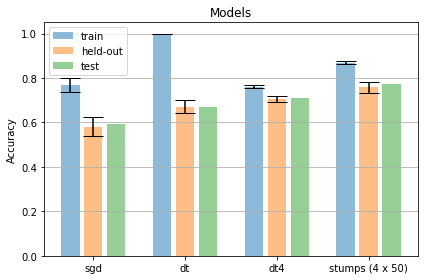

In [31]:
# plot the results

plot_results(acc_train_sgd_avg, std_train_sgd, acc_heldout_sgd_avg, std_heldout_sgd, sgd_testing_accuracy,
             acc_train_dectree_avg, std_train_dectree, acc_heldout_dectree_avg, std_heldout_dectree, dectree_testing_accuracy,
             acc_train_decstump_avg, std_train_decstump, acc_heldout_decstump_avg, std_heldout_decstump, decstump_testing_accuracy,
             acc_train_hybrid_avg, std_train_hybrid, acc_heldout_hybrid_avg, std_heldout_hybrid, sgd_hybrid_testing_accuracy)

In [27]:
# import leaderboard data and predict it

X_leaderboard = np.load("madelon/leaderboard/X_leaderboard.npy")
X_leaderboard_treefeature = np.empty([X_leaderboard.shape[0],100])
index_vec = feature_indexes.astype(int)
for i in range(tree_num):
    X_leaderboard_sub = np.delete(X_leaderboard,index_vec[i,:],1)
    X_leaderboard_treefeature[:,i] = forest[i].predict(X_leaderboard_sub)
Leaderboard_predict = sgd_hybrid.predict(X_leaderboard_treefeature)
filename = 'labels_2a_leaderboard'
np.savetxt("{}.txt".format(filename), Leaderboard_predict, fmt='%i', newline="\n")

In [9]:
# import hidden data and predict it

X_hidden = np.load("madelon/hidden/X_hidden.npy")
X_hidden_treefeature = np.empty([X_hidden.shape[0],100])
index_vec = feature_indexes.astype(int)
for i in range(tree_num):
    X_hidden_sub = np.delete(X_hidden,index_vec[i,:],1)
    X_hidden_treefeature[:,i] = forest[i].predict(X_hidden_sub)
Hidden_predict = sgd_hybrid.predict(X_hidden_treefeature)
filename = 'labels_2a_hidden'
np.savetxt("{}.txt".format(filename), Hidden_predict, fmt='%i', newline="\n")

In [24]:
def train_hybrid_model(X_train, y_train, X_test, y_test):
    # hybrid model full train and test set

    M = X_train.shape[1]      #number of features
    tree_num = 100      #number of trees as features
    # initialize a N by tree_num as new X_train made of outputs from 100 trees
    X_train_treefeature = np.empty([X_train.shape[0],tree_num])   
    forest = []
    feature_indexes = np.empty([tree_num,int(M/2)])
    # train 100 stumps per example as features
    for i in range(tree_num):
        index_vec = list(range(M))
        for j in range(int(M/2)):
            index_vec.pop(random.randrange(0,int(M/2)))
        X_train_sub = np.delete(X_train,index_vec,1)
        newstump = DecisionTreeClassifier(criterion='entropy',max_depth=4)
        newstump = newstump.fit(X_train_sub,y_train)
        X_train_treefeature[:,i] = newstump.predict(X_train_sub)   #output x predictions
        forest.append(newstump)     #output new tree stump classifier
        feature_indexes[i,:] = index_vec      #output feature indexes for this tree

    # apply the stump modified X_train to the sgd classifier
    sgd_hybrid = SGDClassifier(loss = 'log', max_iter = 10000)
    sgd_hybrid = sgd_hybrid.fit(X_train_treefeature,y_train)

    # convert X_test to treefeature and test accuracy on test set
    X_test_treefeature = np.empty([X_test.shape[0],tree_num])
    index_vec = feature_indexes.astype(int)

    for i in range(tree_num):
        X_test_sub = np.delete(X_test,index_vec[i,:],1)
        X_test_treefeature[:,i] = forest[i].predict(X_test_sub)
    sgd_hybrid.predict(X_test_treefeature)
    
    train_accuracy = sgd_hybrid.score(X_train_treefeature,y_train)
    test_accuracy = sgd_hybrid.score(X_test_treefeature,y_test)
    
    return train_accuracy, test_accuracy, sgd_hybrid

In [ ]:
import numpy as np


# When you turn this function in to Gradescope, it is easiest to copy and paste this cell to a new python file called hw1.py
# and upload that file instead of the full Jupyter Notebook code (which will cause problems for Gradescope)
def compute_features(names):
    """
    Given a list of names of length N, return a numpy matrix of shape (N, 260)
    with the features described in problem 2b of the homework assignment.
    
    Parameters
    ----------
    names: A list of strings
        The names to featurize, e.g. ["albert einstein", "marie curie"]
    
    Returns
    -------
    numpy.array:
        A numpy array of shape (N, 260)
    """
    raise NotImplementedError

You are not required to use the functions defined below, but they may be useful for you to think about how to structure your code.

In [ ]:
from sklearn.linear_model import SGDClassifier

def train_and_evaluate_sgd(X_train, y_train, X_test, y_test):
    """
    Trains a SGDClassifier on the training data and computes two accuracy scores, the
    accuracy of the classifier on the training data and the accuracy of the decision
    tree on the testing data.
        
    Parameters
    ----------
    X_train: np.array
        The training features of shape (N_train, k)
    y_train: np.array
        The training labels of shape (N_train)
    X_test: np.array
        The testing features of shape (N_test, k)
    y_test: np.array
        The testing labels of shape (N_test)
    
    Returns
    -------
    The training, testing accuracies, and the trained sgd model represented as a tuple of size 3.
    """
    
    sgd_model = SGDClassifier(loss = 'log', max_iter = 10000)
    sgd_model = sgd_model.fit(X_train,y_train)
    sgd_model.predict(X_test)
    
    
    return 0.0, 0.0, None

In [ ]:
from sklearn.tree import DecisionTreeClassifier


def train_and_evaluate_decision_tree(X_train, y_train, X_test, y_test):
    """
    Trains an unbounded decision tree on the training data and computes two accuracy scores, the
    accuracy of the decision tree on the training data and the accuracy of the decision
    tree on the testing data.
    
    The decision tree should use the information gain criterion (set criterion='entropy')
    
    Parameters
    ----------
    X_train: np.array
        The training features of shape (N_train, k)
    y_train: np.array
        The training labels of shape (N_train)
    X_test: np.array
        The testing features of shape (N_test, k)
    y_test: np.array
        The testing labels of shape (N_test)
    
    Returns
    -------
    The training, testing accuracies, and the trained decision tree model represented as a tuple of size 3.
    """
    
    dectree_model = DecisionTreeClassifier(criterion='entropy')
    
    
    return 0.0, 0.0, None


def train_and_evaluate_decision_stump(X_train, y_train, X_test, y_test):
    """
    Trains a decision stump of maximum depth 4 on the training data and computes two accuracy scores, the
    accuracy of the decision stump on the training data and the accuracy of the decision
    tree on the testing data.
    
    The decision tree should use the information gain criterion (set criterion='entropy')
    
    Parameters
    ----------
    X_train: np.array
        The training features of shape (N_train, k)
    y_train: np.array
        The training labels of shape (N_train)
    X_test: np.array
        The testing features of shape (N_test, k)
    y_test: np.array
        The testing labels of shape (N_test)
    
    Returns
    -------
    The training, testing, the trained stump model accuracies represented as a tuple of size 3.
    """
    
    decstump_model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
    
    
    return 0.0, 0.0, None

In [ ]:
def train_and_evaluate_sgd_with_stumps(X_train, y_train, X_test, y_test):
    """
    Trains a SGDClassifier with stumps on the training data and computes two accuracy scores, the
    accuracy of the classifier on the training data and the accuracy of the decision
    tree on the testing data.
        
    Parameters
    ----------
    X_train: np.array
        The training features of shape (N_train, k)
    y_train: np.array
        The training labels of shape (N_train)
    X_test: np.array
        The testing features of shape (N_test, k)
    y_test: np.array
        The testing labels of shape (N_test)
    
    Returns
    -------
    The training, testing accuracies, and the trained model represented as a tuple of size 3.
    """
    
#     k = X_train.shape[1]      #number of features
#     tree_num = 100      #number of trees as features
#     # initialize a N by tree_num as new X_train made of outputs from 100 trees
#     X_train_treefeature = np.empty([X_train.shape[0],tree_num])   
#     forest = []
#     feature_indexes = np.empty([tree_num,int(k/2)])
#     for i in range(tree_num):
#         index_vec = list(range(k))
#         for j in range(int(k/2)):
#             index_vec.pop(random.randrange(0,int(k/2)))
#         X_train_sub = np.delete(X_train,index_vec,1)
#         newstump = DecisionTreeClassifier(criterion='entropy',max_depth=4)
#         newstump = newstump.fit(X_train_sub,y_train)
#         X_train_treefeature[:,i] = newstump.predict(X_train_sub)   #output x predictions
#         forest.append(newstump)     #output new tree stump classifier
#         feature_indexes[i,:] = index_vec      #output feature indexes for this tree

#     # apply the stump modified X_train to the sgd classifier
#     sgd_hybrid = SGDClassifier(loss = 'log', max_iter = 10000)
#     sgd_hybrid = sgd_hybrid.fit(X_train_treefeature,y_train)

    
    return 0.0, 0.0, None

In [ ]:
def load_cv_split(fold):
    """
    Parameters
    ----------
    fold: int
        The integer index of the split to load, i.e. 0, 1, 2, 3, or 4
        
    Returns
    -------
    A tuple of 4 numpy arrays that correspond to the following items:
        X_train, y_train, X_test, y_test
    """
    return None, None, None, None

In [14]:
import os
import matplotlib.pyplot as plt


def plot_results(sgd_train_acc, sgd_train_std, sgd_heldout_acc, sgd_heldout_std, sgd_test_acc,
                 dt_train_acc, dt_train_std, dt_heldout_acc, dt_heldout_std, dt_test_acc,
                 dt4_train_acc, dt4_train_std, dt4_heldout_acc, dt4_heldout_std, dt4_test_acc,
                 stumps_train_acc, stumps_train_std, stumps_heldout_acc, stumps_heldout_std, stumps_test_acc):
    """
    Plots the final results from problem 2. For each of the 4 classifiers, pass
    the training accuracy, training standard deviation, held-out accuracy, held-out
    standard deviation, and testing accuracy.

    Although it should not be necessary, feel free to edit this method.
    """
    train_x_pos = [0, 4, 8, 12]
    cv_x_pos = [1, 5, 9, 13]
    test_x_pos = [2, 6, 10, 14]
    ticks = cv_x_pos

    labels = ['sgd', 'dt', 'dt4', 'stumps (4 x 50)']

    train_accs = [sgd_train_acc, dt_train_acc, dt4_train_acc, stumps_train_acc]
    train_errors = [sgd_train_std, dt_train_std, dt4_train_std, stumps_train_std]

    cv_accs = [sgd_heldout_acc, dt_heldout_acc, dt4_heldout_acc, stumps_heldout_acc]
    cv_errors = [sgd_heldout_std, dt_heldout_std, dt4_heldout_std, stumps_heldout_std]

    test_accs = [sgd_test_acc, dt_test_acc, dt4_test_acc, stumps_test_acc]

    fig, ax = plt.subplots()
    ax.bar(train_x_pos, train_accs, yerr=train_errors, align='center', alpha=0.5, ecolor='black', capsize=10, label='train')
    ax.bar(cv_x_pos, cv_accs, yerr=cv_errors, align='center', alpha=0.5, ecolor='black', capsize=10, label='held-out')
    ax.bar(test_x_pos, test_accs, align='center', alpha=0.5, capsize=10, label='test')
    ax.set_ylabel('Accuracy')
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)
    ax.set_title('Models')
    ax.yaxis.grid(True)
    ax.legend()
    plt.tight_layout()

In [ ]:
plot_results(0.6, 0.1, 0.7, 0.1, 0.1,
             0.7, 0.2, 0.7, 0.15, 0.2,
             0.8, 0.3, 0.7, 0.2, 0.3,
             0.9, 0.4, 0.7, 0.25, 0.4)

In [15]:
def generate_txt_predictions(trained_model, X, filename):
    """
    This function will write the predictions txt files needed for your prediction submissions. You can access 
    your trained model by following the suggested return values in train_and_evaluate_sgd_with_stumps(). You
    should also be careful to write the correct filename as described in the write up.
    
    Parameters
    ----------
    trained_model: sklearn.base.BaseEstimator
        These are the sklearn models that you trained above on the training data.
    X_leaderboard: np.array
        The leaderboard features of shape (N_leaderboard, k)
    filename: String
        This is the name of the resulting txt file.
    
    """

    predicted_labels = trained_model.predict(X)
    np.savetxt("{}.txt".format(filename), predicted_labels, fmt='%i', newline="\n")



In [26]:
whos

Variable                 Type                      Data/Info
------------------------------------------------------------
DecisionTreeClassifier   ABCMeta                   <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
SGDClassifier            ABCMeta                   <class 'sklearn.linear_mo<...>_gradient.SGDClassifier'>
X_test                   ndarray                   200x600: 120000 elems, type `float64`, 960000 bytes (937.5 kb)
X_test_sub               ndarray                   200x300: 60000 elems, type `float64`, 480000 bytes (468.75 kb)
X_test_treefeature       ndarray                   200x100: 20000 elems, type `float64`, 160000 bytes (156.25 kb)
X_train                  ndarray                   2100x600: 1260000 elems, type `float64`, 10080000 bytes (9.613037109375 Mb)
X_train_sub              ndarray                   2100x300: 630000 elems, type `float64`, 5040000 bytes (4.8065185546875 Mb)
X_train_treefeature      ndarray                   2100x100: 210000 e